In [15]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Name of the CSV file and read in to DataFrame
file = 'Clean_Data/Clean_Schools.csv'
df = pd.read_csv(file, encoding="ISO-8859-1")

In [3]:
# preview df
df.head()

,Unnamed: 0,School Name,School State,Degree Type,Program Cost,Annual Cost,Total Cost
0,449506,SABER College,FL,2,19233.0,NaN,19233
1,459310,Future-Tech Institute,FL,1,NaN,11429.0,11429
2,459329,Fred K Marchman Technical College,FL,1,8557.0,NaN,8557
3,482459,DeVry University-Florida,FL,3,NaN,31391.0,125564
4,487393,Florida Career College-West Palm Beach,FL,1,34445.0,NaN,34445


In [76]:
df.insert(3,'Degree Desc','')
df.head()

,School ID,School Name,School State,Degree Desc,Degree Type,Program Cost,Annual Cost,Total Cost,Degree Name
0,449506,SABER College,FL,,2,19233.0,NaN,19233,
1,459310,Future-Tech Institute,FL,,1,NaN,11429.0,11429,
2,459329,Fred K Marchman Technical College,FL,,1,8557.0,NaN,8557,
3,482459,DeVry University-Florida,FL,,3,NaN,31391.0,125564,
4,487393,Florida Career College-West Palm Beach,FL,,1,34445.0,NaN,34445,


In [85]:
# change 1st column name to school id
df = df.rename(columns= {'Unnamed: 0': 'School ID'})

for row in df.index:
    if df['Degree Type'][row] == 1:
        df['Degree Desc'][row] = 'Undergraduate Certificates or Diplomas'
        
    elif df['Degree Type'][row] == 2:
        df['Degree Desc'][row] = "Associate’s Degrees"
    else:
        df['Degree Desc'][row] = "Bachelor’s Degrees"
df.head()        

/Users/Howard/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/Howard/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Howard/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,School ID,School Name,School State,Degree Desc,Degree Type,Program Cost,Annual Cost,Total Cost,Degree Name
0,449506,SABER College,FL,Associate’s Degrees,2,19233.0,NaN,19233,
1,459310,Future-Tech Institute,FL,Undergraduate Certificates or Diplomas,1,NaN,11429.0,11429,
2,459329,Fred K Marchman Technical College,FL,Undergraduate Certificates or Diplomas,1,8557.0,NaN,8557,
3,482459,DeVry University-Florida,FL,Bachelor’s Degrees,3,NaN,31391.0,125564,
4,487393,Florida Career College-West Palm Beach,FL,Undergraduate Certificates or Diplomas,1,34445.0,NaN,34445,


In [8]:
df.describe()

,School ID,Degree Type,Program Cost,Annual Cost,Total Cost
count,198.000000,198.000000,82.000000,116.000000,198.000000
mean,284844.247475,1.782828,20471.670732,25557.681034,54301.873737
std,158033.837603,0.847994,8365.901042,13347.006844,57139.163327
min,132374.000000,1.000000,5420.000000,6419.000000,5420.000000
25%,135318.250000,1.000000,13752.000000,15699.500000,18881.000000
50%,138363.000000,2.000000,19981.000000,23917.000000,27351.500000
75%,449519.500000,3.000000,26335.750000,31438.000000,75889.000000
max,490975.000000,3.000000,36378.000000,65487.000000,261948.000000


In [9]:
# Identify incomplete rows
df.count()

School ID       198
School Name     198
School State    198
Degree Type     198
Program Cost     82
Annual Cost     116
Total Cost      198
dtype: int64

In [13]:
# Identify data types for each element
df.dtypes

School ID         int64
School Name      object
School State     object
Degree Type       int64
Program Cost    float64
Annual Cost     float64
Total Cost        int64
dtype: object

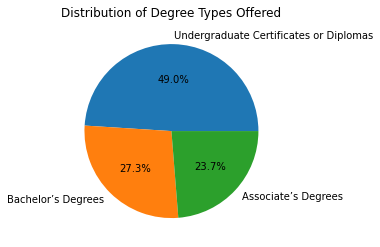

In [61]:
count
labels = 'Undergraduate Certificates or Diplomas','Bachelor’s Degrees','Associate’s Degrees'
sizes = count
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set(title='Distribution of Degree Types Offered')
plt.show()

In [98]:
med_cost = df.groupby(['Degree Desc'])['Total Cost'].median()
avg_cost = df.groupby(['Degree Desc'])['Total Cost'].mean()
avg_cost

Degree Desc
Associate’s Degrees                        32621.234043
Bachelor’s Degrees                        132767.111111
Undergraduate Certificates or Diplomas     21125.247423
Name: Total Cost, dtype: float64

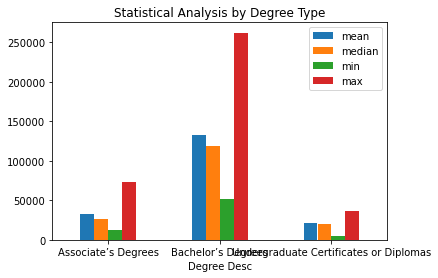

In [92]:
summary_df =df.groupby(['Degree Desc'])['Total Cost'].agg(['mean','median','min','max'])
summary_df.plot.bar(title='Statistical Analysis by Degree Type')
plt.xticks(rotation='horizontal')
plt.show()

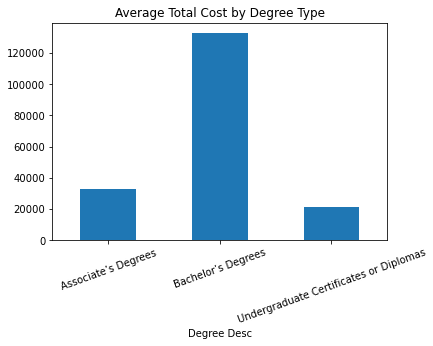

In [101]:
avg_cost.plot(kind='bar', title='Average Total Cost by Degree Type')
plt.xticks(rotation=20)
avg_cost.plot

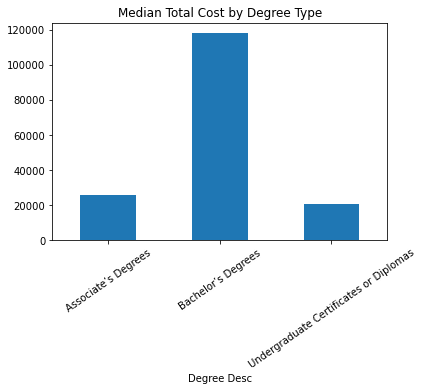

In [97]:
med_cost.plot(kind='bar', title='Median Total Cost by Degree Type')
plt.xticks(rotation=35)
plt.show()